# 1. Visual exploratory data analysis
## 1.1 pandas line plots
In the previous chapter, you saw that the `.plot()` method will place the Index values on the x-axis by default. In this exercise, you'll practice making line plots with specific columns on the x and y axes.

You will work with a dataset consisting of monthly stock prices in 2015 for AAPL, GOOG, and IBM. The stock prices were obtained from [Yahoo Finance](https://finance.yahoo.com/). Your job is to plot the `'Month'` column on the x-axis and the AAPL and IBM prices on the y-axis using a list of column names.

All necessary modules have been imported for you, and the DataFrame is available in the workspace as `df`. Explore it using methods such as `.head()`, `.info()`, and `.describe()` to see the column names.

### Instructions:
* Create a list of y-axis column names called `y_columns` consisting of `'AAPL'` and `'IBM'`.
* Generate a line plot with `x='Month'` and `y=y_columns` as inputs.
* Give the plot a title of `'Monthly stock prices'`.
* Specify the y-axis label.
* Display the plot.

In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Build the DataFrame from data lists
Month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
AAPL = [117.160004, 128.46000700000002, 124.43, 125.150002, 130.279999, 125.43, 121.300003, 112.760002, 110.300003,
        119.5, 118.300003, 105.260002]
GOOG = [534.5224450000002, 558.402511, 548.002468, 537.340027, 532.1099849999998, 520.51001, 625.6099849999998, 618.25,
        608.419983, 710.8099980000002, 742.599976, 758.880005]
IBM = [153.309998, 161.940002, 160.5, 171.28999299999995, 169.649994, 162.660004, 161.990005, 147.889999, 144.970001,
       140.080002, 139.419998, 137.619995]

data = {'Month': Month, 'AAPL': AAPL, 'GOOG': GOOG, 'IBM': IBM}
df = pd.DataFrame(data)

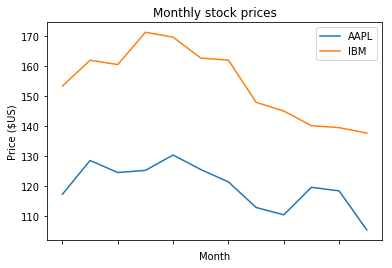

In [18]:
# Create a list of y-axis column names: y_columns
_ = y_columns = ['AAPL', 'IBM']
# Generate a line plot
df.plot(x='Month', y=y_columns)
# Add the title
plt.title('Monthly stock prices')
# Add the y-axis label
plt.ylabel('Price ($US)')
# Display the plot
plt.show()

It looks like the monthly stock prices of both AAPL and IBM peaked early in the year before falling.

## 1.2 pandas scatter plots
Pandas scatter plots are generated using the `kind='scatter'` keyword argument. Scatter plots require that the x and y columns be chosen by specifying the `x` and `y` parameters inside `.plot()`. Scatter plots also take an `s` keyword argument to provide the radius of each circle to plot in pixels.

In this exercise, you're going to plot fuel efficiency (miles-per-gallon) versus horse-power for 392 automobiles manufactured from 1970 to 1982 from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Auto+MPG).

The size of each circle is provided as a NumPy array called `sizes`. This array contains the normalized `'weight'` of each automobile in the dataset.

All necessary modules have been imported and the DataFrame is available in the workspace as `df`.

### Instructions:
* Generate a scatter plot with `'hp'` on the x-axis and `'mpg'` on the y-axis. Specify `s=sizes`.
* Add a title to the plot.
* Specify the x-axis and y-axis labels.

In [21]:
# Load DataFrame
df_auto_mpg = pd.read_csv('_datasets/auto-mpg.csv')
sizes = ((df_auto_mpg['weight']/df_auto_mpg['weight'].max()).values ** 2)*110

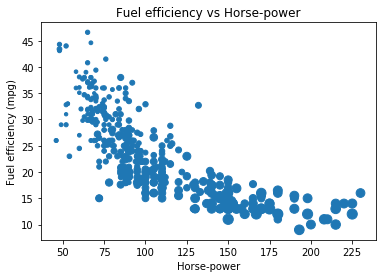

In [22]:
# Generate a scatter plot
df_auto_mpg.plot(kind='scatter', x='hp', y='mpg', s=sizes)

# Add the title
plt.title('Fuel efficiency vs Horse-power')

# Add the x-axis label
plt.xlabel('Horse-power')

# Add the y-axis label
plt.ylabel('Fuel efficiency (mpg)')

# Display the plot
plt.show()

As you would expect, automobiles with higher horsepower are less fuel efficient.

## 1.3 pandas box plots
While pandas can plot multiple columns of data in a single figure, making plots that share the same x and y axes, there are cases where two columns cannot be plotted together because their units do not match. The `.plot()` method can generate subplots for each column being plotted. Here, each plot will be scaled independently.

In this exercise your job is to generate box plots for fuel efficiency (mpg) and weight from the automobiles data set. To do this in a single figure, you'll specify `subplots=True` inside `.plot()` to generate two separate plots.

All necessary modules have been imported and the automobiles dataset is available in the workspace as df.

### Instructions:
* Make a list called `cols` of the column names to be plotted: `'weight'` and `'mpg'`.
* Call plot on `df[cols]` to generate a box plot of the two columns in a single figure. To do this, specify `subplots=True`.

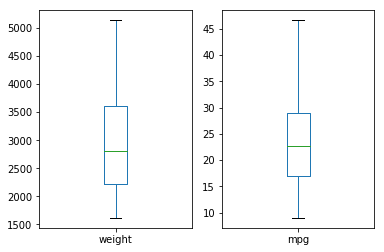

In [23]:
# Make a list of the column names to be plotted: cols
cols = ['weight', 'mpg']

# Generate the box plots
df_auto_mpg[cols].plot(kind='box', subplots=True)

# Display the plot
plt.show()

Box plots are a great way to visualize important summary statistics.

## 1.4 pandas hist, pdf and cdf
Pandas relies on the `.hist()` method to not only generate histograms, but also plots of probability density functions (PDFs) and cumulative density functions (CDFs).

In this exercise, you will work with a dataset consisting of restaurant bills that includes the amount customers tipped.

The original dataset is provided by the [Seaborn package](https://github.com/mwaskom/seaborn-data/blob/master/tips.csv).

Your job is to plot a PDF and CDF for the `fraction` column of the tips dataset. This column contains information about what fraction of the total bill is comprised of the tip.

Remember, when plotting the PDF, you need to specify `normed=True` in your call to `.hist()`, and when plotting the CDF, you need to specify `cumulative=True` in addition to `normed=True`.

All necessary modules have been imported and the tips dataset is available in the workspace as `df`. Also, some formatting code has been written so that the plots you generate will appear on separate rows.

### Instructions:
* Plot a PDF for the values in `fraction` with 30 `bins` between 0 and 30%. The range has been taken care of for you. `ax=axes[0]` means that this plot will appear in the first row.
* Plot a CDF for the values in `fraction` with 30 `bins` between 0 and 30%. Again, the range has been specified for you. To make the CDF appear on the second row, you need to specify `ax=axes[1]`.

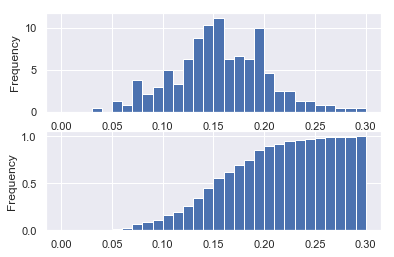

In [27]:
# Set default Seaborn style
import seaborn as sns
sns.set()

# Load DataFrame
df_tips = pd.read_csv('_datasets/tips.csv')

# This formats the plots such that they appear on separate rows
fig, axes = plt.subplots(nrows=2, ncols=1)

# Plot the PDF
df_tips.fraction.plot(ax=axes[0], kind='hist', bins=30, density=True, range=(0,.3))

# Plot the CDF
df_tips.fraction.plot(ax=axes[1], kind='hist', bins=30, density=True, cumulative=True, range=(0,.3))
plt.show()